## B198 End-to-End Data Science Project
## Name- Indranil
## Student No.- GH1026152

## Data- https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

Spam is a major challenge for individuals and organizations. It's not just a nuisance; it poses significant threats:

1. Productivity Loss: Employees spend valuable time manually sifting through and deleting junk emails.

2. Security Risks: Phishing emails, a common form of spam, trick users into revealing sensitive information like login credentials and financial data. Spam can also contain malware, which can compromise an organization's entire network.

3. Resource Consumption: Spam consumes server storage, network bandwidth, and computing resources, increasing operational costs.

4. Evolving Threats: Spammers constantly change their tactics, using new keywords, obfuscation techniques, and images to bypass traditional rule-based filters. This makes it difficult to maintain effective defense mechanisms manually.

We have to develop a robust, adaptive, and scalable solution that can automatically and accurately identify and filter out spam emails. The main priority of the model is to precise even if it is less accurate as the model should not filter a 'ham' message and put it in 'spam' as it can lead to leaving out important messages. In other words, this must not only block spam but also minimize false positives (legitimate emails incorrectly marked as spam).


Model Training: The vectorized data is fed into a machine learning algorithm. A classifier, such as Multinomial Naive Bayes, Support Vector Machine (SVM), or a deep learning model, learns the patterns that distinguish spam from legitimate emails. The model is trained on a portion of the dataset and validated on another to ensure it generalizes well.


Model Evaluation: The model's performance is evaluated using metrics that are crucial for spam detection, such as precision and accuracy.

Precision: The percentage of emails the model flagged as spam that were actually spam. High precision means fewer false positives.

Deployment and Monitoring: The trained model is integrated into a live system (e.g., an email server). A continuous monitoring loop is essential to retrain the model with new data over time, as spammers' tactics evolve. This ensures the filter remains effective and adaptive.

In [94]:
!pip install pandas numpy scikit-learn nltk plotly matplotlib seaborn

  Using cached plotly-6.5.0-py3-none-any.whl.metadata (8.5 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.6 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/9.9 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.9 MB 1.1 MB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.9 MB 1.0 MB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.9 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 1.0 MB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.9 MB 1.0 MB/s eta 0:00:09
   ------- -------------------------------- 1.8/9.9 MB 939.3 kB/s eta 0:00:09
   -------- ------------------------------- 2.1/9.9 MB 952.0 kB/s eta 0:00:09
   --------- -----------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Labelling

I gathered a large dataset of emails, each labeled as either "spam" or "ham" from Kaggle. I then lablled the data with "spam" = 1 and "Ham" = 0 to prepare the data for exploratory data analysis.

In [51]:
df = pd.read_csv(r"C:\Users\indra\Desktop\1st Sem\Qtr 8\AI and ML\spam.csv", encoding='latin1')

df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
df.shape

(5572, 5)

## 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Since the last three colums have a lot of null values we drop them as they are not necessary for our analysis

In [54]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, errors='ignore')

In [55]:
df.sample(5)

,v1,v2
144,ham,Yes see ya not on the dot
1417,ham,No wonder... Cos i dun rem seeing a silver car...
5226,ham,Prabha..i'm soryda..realy..frm heart i'm sory
5115,spam,"Get 3 Lions England tone, reply lionm 4 mono o..."
1807,ham,Do have a nice day today. I love you so dearly.


Since, the column names does not tell give us much information about the arget and the text column, I will be changing them for better understanding of the dataset

In [56]:
#ranaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
4356,ham,"HELLOGORGEOUS, HOWS U? MY FONE WAS ON CHARGE L..."
2400,ham,Hi! This is Roger from CL. How are you?
3491,ham,I will reach office around &lt;DECIMAL&gt; . ...
1257,ham,Am also doing in cbe only. But have to pay.
3080,ham,Have a great trip to India. And bring the ligh...


Our 'target' has just two values "ham" and "spam" so I will encode them to numerical value ham = 0 and spam = 1 using lable encoder

In [57]:

encoder = LabelEncoder()


In [58]:
df['target'] = encoder.fit_transform(df['target'])

In [59]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [60]:
#Checking for Missng values

df.isnull().sum()

target    0
text      0
dtype: int64

In [61]:
#checking for duplicate values
df.duplicated().sum()

np.int64(403)

There are 403 duplicate values. We will remove the duplicate values before training the model 

In [62]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [63]:
df.shape

(5169, 2)

I will split the data into test and train model and do aal the exploratory data analysis on the "train" data set and applying the same on the "test" data set.

In [64]:


X=df.drop(columns='target', axis=1)
y=df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Data Exploration/ EDA

In [65]:
y_train.value_counts()

target
0    3620
1     515
Name: count, dtype: int64

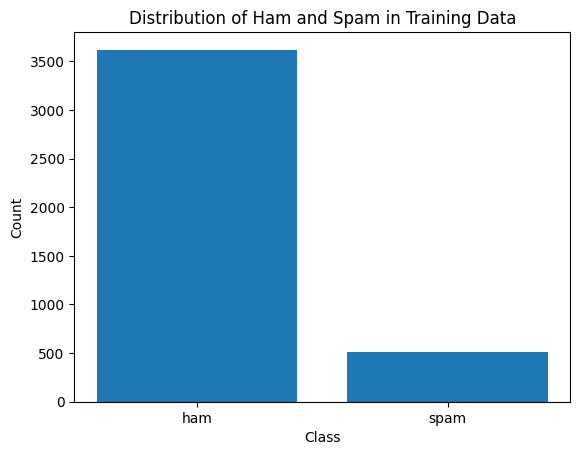

In [66]:

counts = y_train.value_counts()
plt.bar(['ham', 'spam'], counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam in Training Data')
plt.show()

This dataset is an imbalanced dataset as it has more 'ham'(=3620) values and less 'spam'(=515) and for an imbalanced dataset, it is a classification problem.

In [67]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

To explore the data further, I am creating new features (number of characters, number of words and number of sentences). This helps us understand the data better.

In [68]:
# number of characters
X_train['num_char']=X_train['text'].apply(len)
X_test['num_char']=X_test['text'].apply(len)
X_train.head()

,text,num_char
4228,Have you bookedthe hut? And also your time off...,71
3061,Fine. Do you remember me.,25
3345,U're welcome... Caught u using broken english ...,54
3463,My phone,8
2649,You might want to pull out more just in case a...,157


In [69]:

nltk.download('punkt_tab')

# number of words
X_train['num_words'] = X_train['text'].apply(lambda x: len(nltk.word_tokenize(x)))
X_test['num_words'] = X_test['text'].apply(lambda x: len(nltk.word_tokenize(x)))
X_train.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,num_char,num_words
4228,Have you bookedthe hut? And also your time off...,71,18
3061,Fine. Do you remember me.,25,7
3345,U're welcome... Caught u using broken english ...,54,11
3463,My phone,8,2
2649,You might want to pull out more just in case a...,157,34


In [70]:
# number of sentences
X_train['num_sent'] = X_train['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
X_test['num_sent'] = X_test['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
X_train.head()


,text,num_char,num_words,num_sent
4228,Have you bookedthe hut? And also your time off...,71,18,3
3061,Fine. Do you remember me.,25,7,2
3345,U're welcome... Caught u using broken english ...,54,11,2
3463,My phone,8,2,1
2649,You might want to pull out more just in case a...,157,34,1


In [71]:
X_train[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4135.000000,4135.000000,4135.000000
mean,79.328900,18.582830,1.975333
std,59.490936,13.718905,1.480030
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


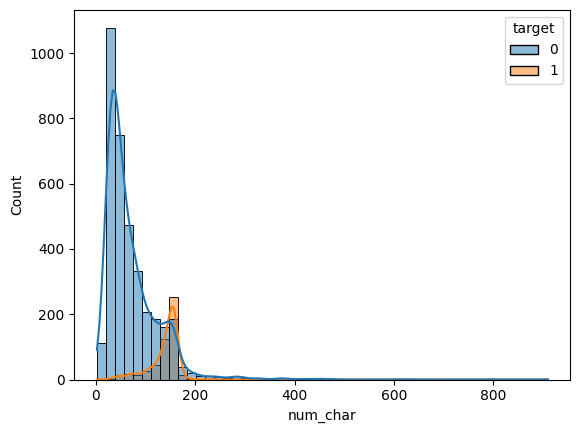

<Figure size 1200x800 with 0 Axes>

In [72]:
# number of characters
sns.histplot(data=X_train, x='num_char', hue=y_train, bins=50, kde=True)
plt.figure(figsize=(12,8))
plt.show()

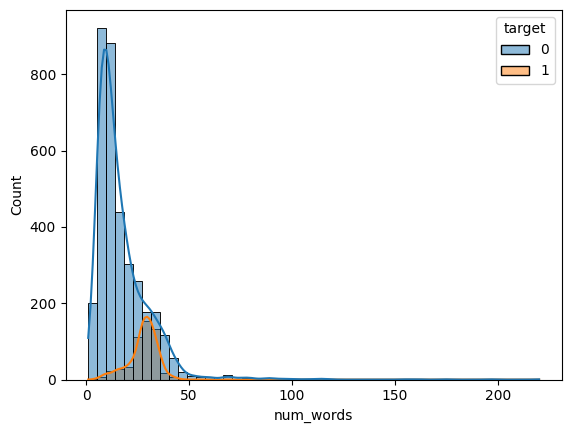

<Figure size 1200x800 with 0 Axes>

In [73]:
# number of words
sns.histplot(data=X_train, x='num_words', hue=y_train, bins=50, kde=True)
plt.figure(figsize=(12,8))
plt.show()

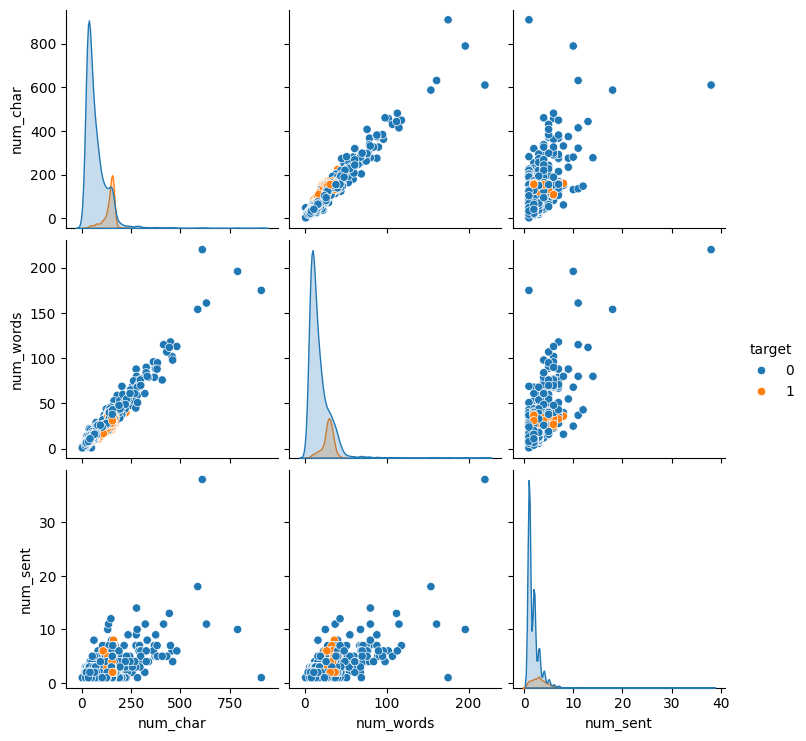

In [74]:
X_train_plot = X_train.copy()
X_train_plot['target'] = y_train.values
sns.pairplot(X_train_plot, hue='target')
plt.show()

<Axes: >

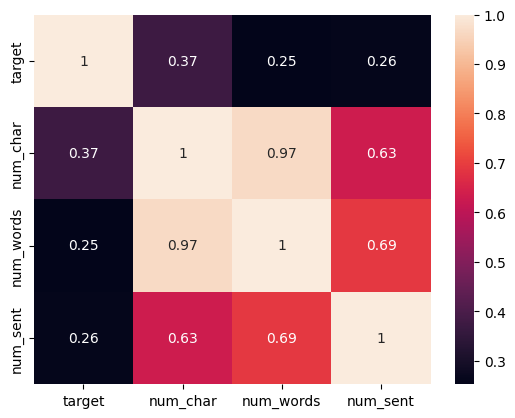

In [75]:
# correlation matrix for numeric columns
sns.heatmap(X_train_plot[['target', 'num_char', 'num_words', 'num_sent']].corr(),annot=True)

Target has 0.37 correlation with the number of character ('num_char'). This suggests that higher the number of characters, higher is the chance of the message being a spam message. Similar trend is seen with respect to the number of words('num_words'=0.26) and the number of sentences('num_sent'=0.26).

We also notice a strong colinearity between num_char, num_words and num_sent. We will only choose num_char for our model building as it has  the strongest correlation with the target.

## Data Preprocessing / Text Preprocessing

In data preprocessing for text data, we need to transform the text into numerical format for the machine to understand it:
1. Lower case: We need to convert the whole of the text into lower case.
2. Tokenization: We need to break down sentences into individual words or "tokens."
3. Removing special characters
4. Removing puntuation ('.',','?','!',';') and stop words ('is', 'or', 'the', 'and' etc.) as it doesn't add much meaning for the machine
5. Stemming

In [76]:


def transform_text(text):
    text = text.lower() # lower case
    text = nltk.word_tokenize(text) # tokenization

    y = []
    for i in text:
        if i.isalnum(): # removing special characters but keeping alphanumeric characters
            y.append(i)

    text = y[:]
    y.clear()

    # removing stop words and puntuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # stemming
    text = y[:]
    y.clear()
    ps = PorterStemmer()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [77]:
# alpplying all these transformations to the text column and storing it in a new column 'transformed_text' 

nltk.download('stopwords')

X_train['transformed_text'] = X_train['text'].apply(transform_text)
X_test['transformed_text'] = X_test['text'].apply(transform_text)
X_train.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\indra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,num_char,num_words,num_sent,transformed_text
4228,Have you bookedthe hut? And also your time off...,71,18,3,bookedth hut also time way
3061,Fine. Do you remember me.,25,7,2,fine rememb
3345,U're welcome... Caught u using broken english ...,54,11,2,u welcom caught u use broken english
3463,My phone,8,2,1,phone
2649,You might want to pull out more just in case a...,157,34,1,might want pull case plan spend much confid de...


## Feature Engineering
We have to vectorise the transformed text with the help of bag of words or TF-IDF which weigh the importance of a word in a document relative to the entire dataset.

In [78]:

cv = CountVectorizer()
tfidf = TfidfVectorizer()

**Using TF-IDF**

In [79]:
X_train = tfidf.fit_transform(X_train['transformed_text']).toarray()
X_test = tfidf.transform(X_test['transformed_text']).toarray()

In [80]:
X_train.shape


(4135, 5921)

In [81]:
y_train.shape

(4135,)

## Model Building/ Model Training

For Text detection, the best model is Naive Bayes so I will be testing and traing the three Naive Bayes Algorithms which are "Gaussian Naive Bayes", "Multinomial Naive Bayes" and "Bernoulli Naive Bayes". While also testing K nearest neighbours, SVC and logistic regression models

In [82]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
svc = SVC()
lr = LogisticRegression()


**Naive Bayes**

In [83]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes")
print("Accuracy - ",accuracy_gnb)
print("Precision - ",precision_gnb)
print("F1 Score - ",f1_gnb)
print("Confusion matrix - ")
print(confusion_matrix(y_test, y_pred_gnb))

print("Recall - ",recall_score(y_test, y_pred_gnb))


Gaussian Naive Bayes
Accuracy -  0.8752417794970987
Precision -  0.5207373271889401
F1 Score -  0.6366197183098592
Confusion matrix - 
[[792 104]
 [ 25 113]]
Recall -  0.8188405797101449


In [84]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
precision_mnb = precision_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb)
print("Multinomial Naive Bayes")
print("Accuracy - ",accuracy_mnb)
print("Precision - ",precision_mnb)
print("F1 Score - ",f1_mnb)
print("Confusion matrix - ")
print(confusion_matrix(y_test, y_pred_mnb))

print("Recall - ",recall_score(y_test, y_pred_mnb))

Multinomial Naive Bayes
Accuracy -  0.9584139264990329
Precision -  1.0
F1 Score -  0.8154506437768241
Confusion matrix - 
[[896   0]
 [ 43  95]]
Recall -  0.6884057971014492


In [85]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)
print("Bernoulli Naive Bayes")
print("Accuracy - ",accuracy_bnb)
print("Precision - ",precision_bnb)
print("F1 Score - ",f1_bnb)
print("Confusion matrix - ")
print(confusion_matrix(y_test, y_pred_bnb))

print("Recall - ",recall_score(y_test, y_pred_bnb))


Bernoulli Naive Bayes
Accuracy -  0.965183752417795
Precision -  1.0
F1 Score -  0.85
Confusion matrix - 
[[896   0]
 [ 36 102]]
Recall -  0.7391304347826086


**KNN**

In [86]:
## KNN
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("K Nearest Neighbors")
print("Accuracy - ",accuracy_knn)
print("Precision - ",precision_knn)
print("F1 Score - ",f1_knn)
print("Confusion matrix - ")
print(confusion_matrix(y_test, y_pred_knn))

print("Recall - ",recall_score(y_test, y_pred_knn))



K Nearest Neighbors
Accuracy -  0.9052224371373307
Precision -  1.0
F1 Score -  0.449438202247191
Confusion matrix - 
[[896   0]
 [ 98  40]]
Recall -  0.2898550724637681


**SVC**

In [87]:

svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)

print("Support Vector Classifier")
print("Accuracy - ",accuracy_svc)
print("Precision - ",precision_svc)
print("F1 Score - ",f1_svc)
print("Confusion matrix - ")
print(confusion_matrix(y_test, y_pred_svc))

print("Recall - ",recall_score(y_test, y_pred_svc))



Support Vector Classifier
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
F1 Score -  0.8976377952755905
Confusion matrix - 
[[894   2]
 [ 24 114]]
Recall -  0.8260869565217391


**Logistic Regression**

In [88]:
#Logistic Regression
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression")
print("Accuracy - ",accuracy_lr)
print("Precision - ",precision_lr)
print("F1 Score - ",f1_lr)
print("Confusion matrix - ")
print(confusion_matrix(y_test, y_pred_lr))
print("Recall - ",recall_score(y_test, y_pred_lr))



Logistic Regression
Accuracy -  0.9584139264990329
Precision -  0.9797979797979798
F1 Score -  0.8185654008438819
Confusion matrix - 
[[894   2]
 [ 41  97]]
Recall -  0.7028985507246377


## Model Evaluation

In [89]:
performance = {'Model': ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'K Nearest Neighbors', 'Support Vector Classifier', 'Logistic Regression'],
               'Precision': [precision_gnb, precision_mnb, precision_bnb, precision_knn, precision_svc, precision_lr],
               'Accuracy': [accuracy_gnb, accuracy_mnb, accuracy_bnb, accuracy_knn, accuracy_svc, accuracy_lr],
               'F1 Score': [f1_gnb, f1_mnb, f1_bnb, f1_knn, f1_svc, f1_lr] }
performance_df = pd.DataFrame(performance)
performance_df.sort_values(by='Precision', ascending=False, inplace=True)
performance_df

,Model,Precision,Accuracy,F1 Score
1,Multinomial Naive Bayes,1.000000,0.958414,0.815451
2,Bernoulli Naive Bayes,1.000000,0.965184,0.850000
3,K Nearest Neighbors,1.000000,0.905222,0.449438
4,Support Vector Classifier,0.982759,0.974855,0.897638
5,Logistic Regression,0.979798,0.958414,0.818565
0,Gaussian Naive Bayes,0.520737,0.875242,0.636620


After evaluating all the algorithms and trying to find the best performing Model based on precision. It is clear that Multinomial Naive Bayes, Bernoulli Naive Bayes and KNN are the best model for this task.
Although, acurracy is not the most important for an imbalances dataset like this but still I will be choosing Bernoulli Naive Bayes as It has a precision score of 1 and accuracy of 96.5%.

In [90]:
# Sample a mail from the test set using the original DataFrame
sample_idx = y_test.sample(1).index[0]
input_mail = X.loc[sample_idx, 'text']
print(input_mail)

transformed_mail = [transform_text(input_mail)]
vectorized_mail = tfidf.transform(transformed_mail).toarray()
print(vectorized_mail)

prediction = bnb.predict(vectorized_mail)
print(prediction)
if prediction[0] == 1:
    print("Spam")  
else:
    print("Not Spam")   


How are you. Its been ages. How's abj
[[0. 0. 0. ... 0. 0. 0.]]
[0]
Not Spam


# Final discussion, strengths & limitations, recommendations

**Strengths**

1. The model is able to identify all the 'spam' messages as spam with 100% precision.
2. It has an accuracy of 96.52% which means that majority of 'ham' messages are also labled as ham. 
3. The confusion matrix shows a very less false positives.
4. The pipeline is simple and explainable.

**Weakness**
1. The accuracy could be higher.
2. Hyperparameter adjustments could be done to increase the detection of false positives to make the model even more robust.
3. The data could have been used to train more models like random forest etc.

**Conclusion and Final Discussions**

In Conclusion, The model is robust and simple as it can identify 'spam' messages with a precision score of 1. While using bag of words(Count vectoriser), the model had low precision and accuracy so, Tf-Idf vectoriser was used.  The model can be scaled after some hyperparameter tuning to increase the accuracy of the model aswell and if it is made into a website for people to use.